In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PyQt5.QtCore import QCoreApplication, QTimer, Qt
from PyQt5.QtNetwork import QTcpSocket
from scipy.optimize import curve_fit

import os

os.chdir(r"D:\NanoDiamond\PulseSequencer")

from IPython.display import display

from Interfaces.dataSaver import dataSaver

from Data.pulseConfiguration import pulseConfiguration
from Data.microwaveConfiguration import microwaveConfiguration
from Data.measurementType import measurementType
from Data.repetition import repetition

from LogicManagers.measurementManager import measurementManager
from LogicManagers.scanManager import scanManager
from LogicManagers import pulseAnalayzer

## MW generator settings

In [2]:
MW_start_frequency = 2870
MW_stop_frequency = 2920
RF_power_min = -18
RF_power_max = 1
RF_step_size = 2
RF_power = np.arange(RF_power_min, RF_power_max, RF_step_size)

microwaveConfiguration = microwaveConfiguration(
    startFreq = MW_start_frequency,
    stopFreq = MW_stop_frequency,
    stepSize = (MW_stop_frequency - MW_start_frequency) / 1024,
    stepTime = 1,  # [ms]
    power = 0,
    trigMode = 1)

## ODMR measurment settings

In [3]:
pulseConfig = pulseConfiguration()

pulseConfig.count_duration = 1000
pulseConfig.samples_number = 1024
pulseConfig.threshold = 1.6
pulseConfig.low_voltage_AOM = 0
pulseConfig.high_voltage_AOM = 0.9
pulseConfig.measurement_type = measurementType.ODMR

In [4]:
measurement_manager = measurementManager()
measurement_manager.connectToEverything()

transitionWidth = {}
transitionWidthUncertainty = {}
amplitude = {}
amplitudeUncertainty = {}

The IP address of rp-f09ded.local is 132.72.13.15
Connecting to red pitaya: 132.72.13.15 1001
connected to pulse blaster
WindFreak is connected


In [5]:
def lorentzian(x, a, x_0, g, c):
    return ((a*g / 2) / ((x-x_0)**2 + (g/2)**2)) + c 

def fitToLorentzian(data, RF_power, initial_guess):   # fits data and saves parameters
    xLabel = measurement_manager.ODMRXAxisLabel
    yLabel = measurement_manager.ODMRYAxisLabel

    frequency, counts = data[xLabel], data[yLabel]
    
    popt, pcov = curve_fit(lorentzian, frequency, counts, initial_guess)

    # save fit parameters 
    transitionWidth[RF_power] = popt[2]
    transitionWidthUncertainty[RF_power] = pcov[2][2]
    amplitude[RF_power] = popt[0]
    amplitudeUncertainty[RF_power] = pcov[0][0]

    return popt, pcov
    
        

In [8]:
def plotData(data, fit_popt, power):       
    xLabel = measurement_manager.ODMRXAxisLabel
    yLabel = measurement_manager.ODMRYAxisLabel

    frequency, counts = data[xLabel], data[yLabel]
    
    plt.plot(frequency, counts, label = "ODMR data, power: " + str(power))
    
    plt.legend()

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)

def plotDataNormalized(data, fit_popt, power):       
    xLabel = measurement_manager.ODMRXAxisLabel
    yLabel = measurement_manager.ODMRYAxisLabel

    frequency, counts = data[xLabel], data[yLabel]

    print(np.array(counts))
    counts_array = np.array(counts) - fit_popt[3]
    print(counts_array)

    plt.plot(frequency, counts_array, label = "ODMR data, power: " + str(power))
    
    plt.legend()

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)


def plotFit(data, popt, power):
    xLabel = measurement_manager.ODMRXAxisLabel
    yLabel = measurement_manager.ODMRYAxisLabel

    frequency, counts = data[xLabel], data[yLabel]
    
    fit_frequencies = np.linspace(frequency[0], frequency.iloc[-1], 3000)
    plt.plot(fit_frequencies, lorentzian(fit_frequencies, popt[0], popt[1], popt[2], popt[3]), label = "lorentzian fit, power = " + str(power))

def plotFitNormalized(data, popt, power):
    xLabel = measurement_manager.ODMRXAxisLabel
    yLabel = measurement_manager.ODMRYAxisLabel

    frequency, counts = data[xLabel], data[yLabel]
    
    fit_frequencies = np.linspace(frequency[0], frequency.iloc[-1], 3000)
    plt.plot(fit_frequencies, lorentzian(fit_frequencies, popt[0], popt[1], popt[2], 0), label = "lorentzian fit, power = " + str(power))

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak ODMR configuration sent
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Conne

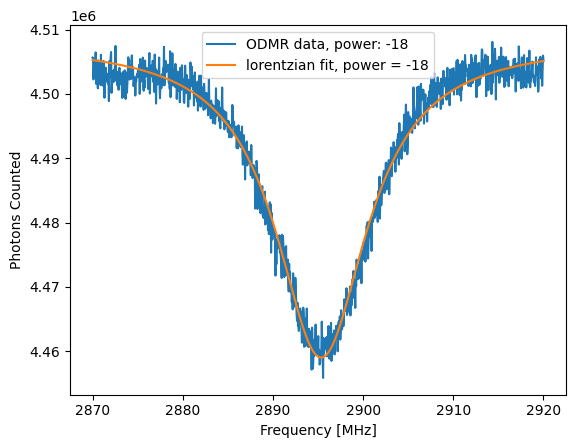

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak ODMR configuration sent
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Conne

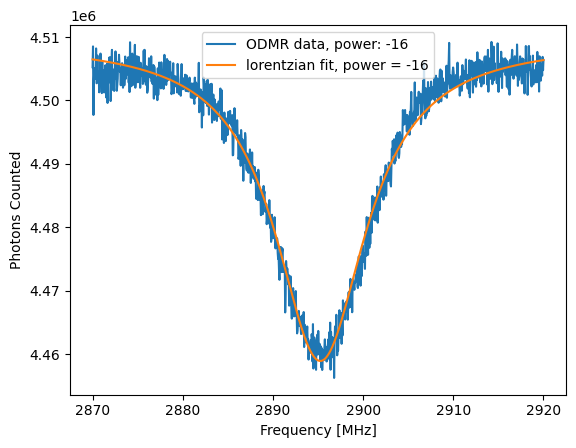

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak ODMR configuration sent
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Conne

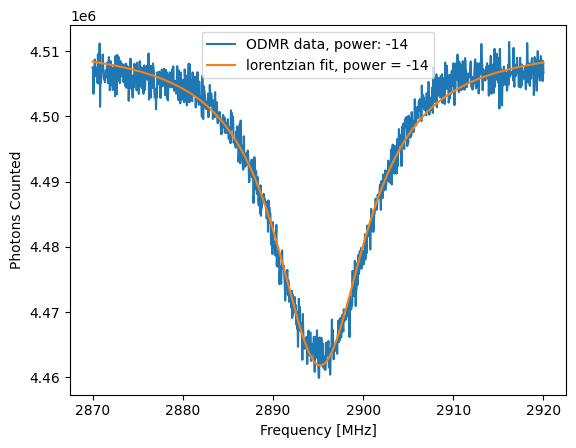

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak ODMR configuration sent
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Conne

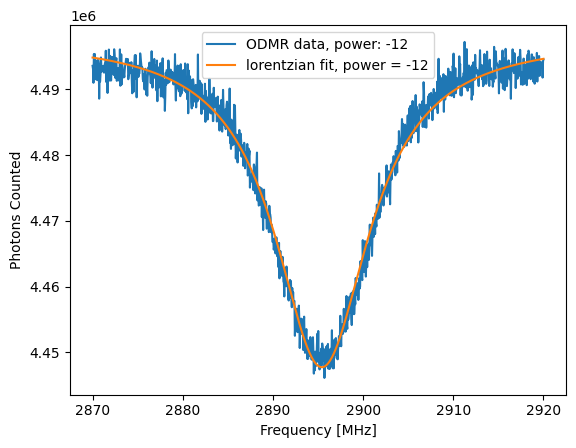

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak ODMR configuration sent
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Conne

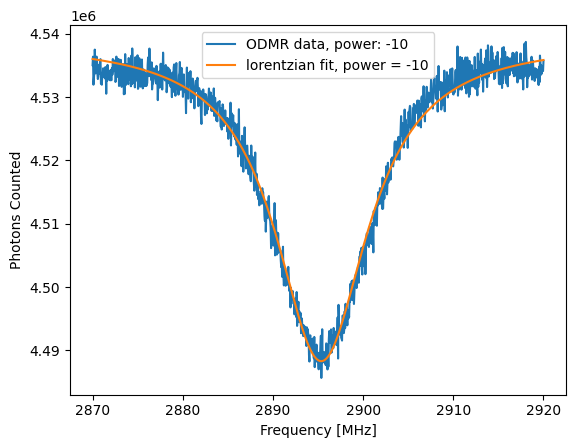

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak ODMR configuration sent
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Conne

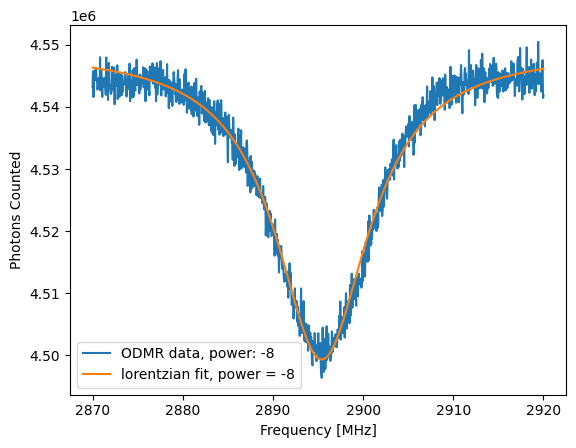

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak ODMR configuration sent
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Conne

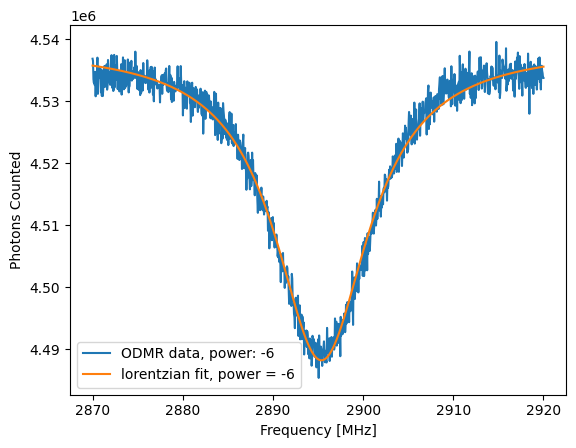

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak ODMR configuration sent
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Conne

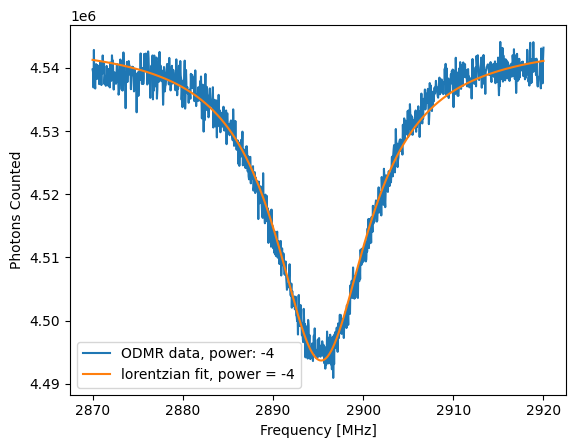

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak ODMR configuration sent
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Conne

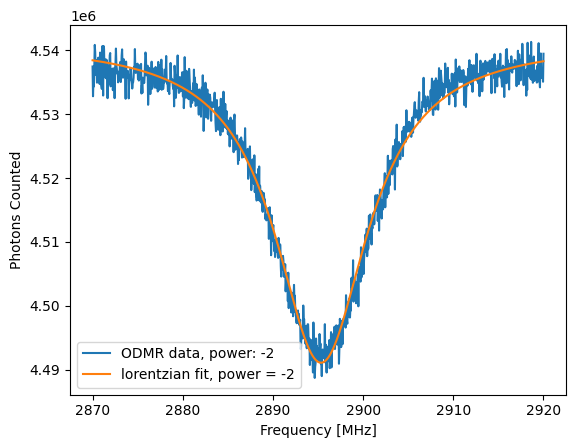

AOM voltage: 0.9
Configuration sent to red pitaya
configured pulse blaster
Windfreak ODMR configuration sent
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Connecting to red pitaya: 132.72.13.15 1001
new ODMR measurement started
recived new data, bytes: 8192
All the data was recived
disconnect from Red Pitaya
Conne

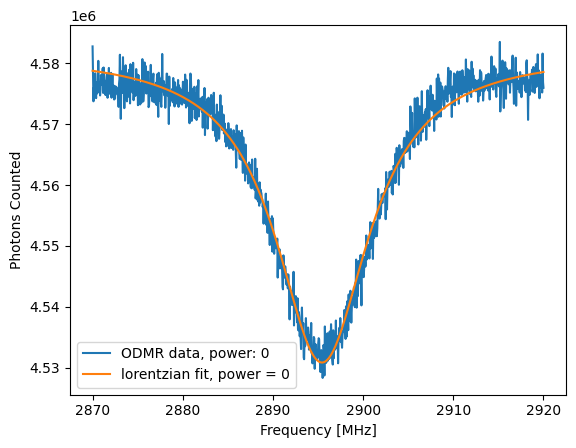

In [9]:
initial_guess = np.array([-0.1e6, 2890, 3, 4e6])

odmrFit = {}
odmrData = {}

for rf_power in RF_power:
    microwaveConfiguration.power = rf_power
    data = measurement_manager.startNewODMRMeasurement(
        pulseConfig = pulseConfig,
        micrwaveConfig = microwaveConfiguration,
        repeat = repetition.RepeatAndSum,
        maxRepetitions = int(500)
    )

    popt, pcov = fitToLorentzian(data, rf_power, initial_guess)

    odmrData[rf_power] = data
    odmrFit[rf_power] = (popt, pcov)

    print("Power:", rf_power)
    plotData(data, popt, rf_power)
    plotFit(data, popt, rf_power)
    plt.legend()
    plt.show()

## plot the data

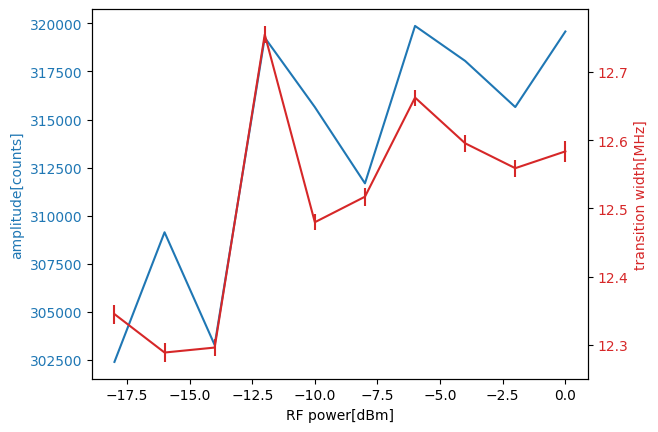

In [10]:

fig, ax1 = plt.subplots()

# ax1.errorbar(RF_power, np.array(list(dict.values(amplitude))), yerr = np.array(list(dict.values(amplitudeUncertainty))), color='tab:blue')
ax1.errorbar(RF_power, abs(np.array(list(dict.values(amplitude)))), color='tab:blue')
ax1.set_xlabel('RF power[dBm]')
#print(np.array(list(dict.values(amplitudeUncertainty))))
ax1.set_ylabel('amplitude[counts]', color='tab:blue')
for tl in ax1.get_yticklabels():
    tl.set_color('tab:blue')

ax2 = ax1.twinx()

ax2.errorbar(RF_power, np.array(list(dict.values(transitionWidth))), yerr = np.array(list(dict.values(transitionWidthUncertainty))), color = 'tab:red')
ax2.set_ylabel('transition width[MHz]', color='tab:red')
#print(np.array(list(dict.values(transitionWidthUncertainty))))
for tl in ax2.get_yticklabels():
    tl.set_color('tab:red')

plt.show()


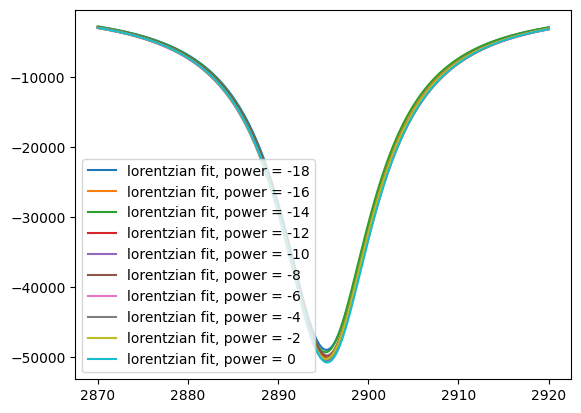

[4505645.         4505602.01964201 4502245.85414751 ... 4503500.58858158
 4505944.46043297 4505170.22433575]
[-2349.2881098  -2392.26846779 -5748.43396229 ... -4493.69952822
 -2049.82767682 -2824.06377404]
[4505244.         4508514.18196316 4497715.45887536 ... 4506865.98032284
 4504772.04600803 4506379.44025516]
[ -4036.60501897   -766.42305581 -11565.14614361 ...  -2414.62469613
  -4508.55901094  -2901.16476381]
[4507508.         4507172.06907597 4503484.9179131  ... 4505409.67506951
 4508478.94629658 4506636.61580023]
[-3631.16098426 -3967.0919083  -7654.24307116 ... -5729.48591475
 -2660.21468769 -4502.54518404]
[4493585.         4493131.95543608 4491009.42961664 ... 4491798.51024328
 4494300.53431802 4494549.84029115]
[-4226.77399725 -4679.81856117 -6802.34438061 ... -6013.26375397
 -3511.23967923 -3261.93370609]
[4535040.         4536370.24909543 4531949.34107048 ... 4534227.49795519
 4534097.23255564 4535706.53973106]
[-3851.32204754 -2521.07295211 -6941.98097706 ... -4663.82409

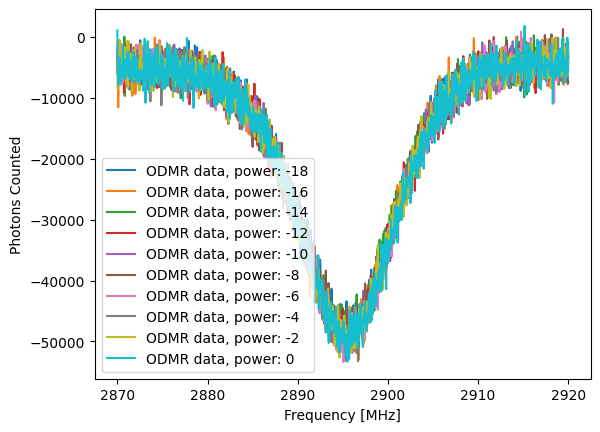

In [11]:
for power in RF_power:
    popt, c = odmrFit[power]
    plotFitNormalized(odmrData[power], popt, power)

plt.legend()
plt.show()

for power in RF_power:
    popt, c = odmrFit[power]
    plotDataNormalized(odmrData[power], popt, power)

plt.legend()
plt.show()
